<a href="https://colab.research.google.com/github/katherymbr/Dim_fractalMontecarlo_Sierpinskipinsk/blob/main/R0_IMAGENES_MIAS_SELECCIONADAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMAGENES MIAS_SELECCIONADAS PARA PROYECTO

La base de datos MIAS original (digitalizada con un borde de píxel de 50 micras) se ha reducido a un borde de píxel de 200 micras y se ha recortado/rellenado para que cada imagen tenga 1024 × 1024 píxeles.

Este archivo enumera las películas de la base de datos MIAS y proporciona     
la información pertinente:

              El origen del sistema de coordenadas es la esquina inferior izquierda.


1ª columna: Número de referencia de la base de datos MIAS.

2ª columna: Carácter del tejido de fondo:

                F - Graso
                G - Graso-glandular
                D - Denso-glandular

3ª columna: Clase de anomalía presente:

                CALC - Calcificación
                CIRC - Masas bien definidas/circunscritas
                SPIC - Masas espiculadas
                MISC - Otras masas mal definidas
                ARCH - Distorsión arquitectónica
                ASYM - Asimetría
                NORM - Normal

4ª columna: Gravedad de la anomalía
                B - Benigno
                M - Maligno
                
5ª,6ª columnas: coordenadas x,y de la imagen del centro de la anomalía.

7ª columna: Radio aproximado (en píxeles) de un círculo que rodea la anomalía.
	    la anomalía.
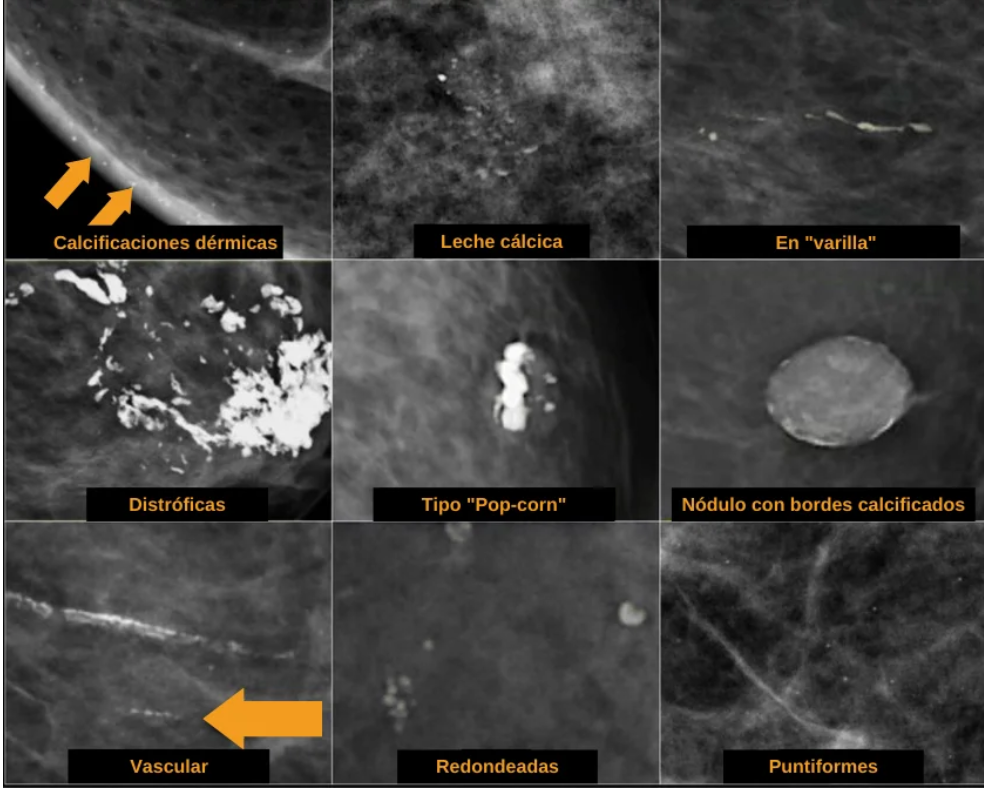

# LIBRERIAS

In [ ]:
import imageio as io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from PIL import Image
from skimage import data
from skimage.filters import threshold_multiotsu
import matplotlib


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# FUNCIONES

In [ ]:
# LEER IMAGEN
def leer_imagen(rute):
  imagen= io.imread(rute)
  return(imagen)

ruta='/content/drive/MyDrive/'

In [ ]:
# TAMAÑO DE LA IMAGEN Y EL PIXEL MÁXIMO Y MÍNIMO

def tamaño_imagen(imagen):
    print('dimensiones de la imagen', imagen.shape)
    print ('valor MINIMO del pixel:',imagen.min())
    print('valor MÁXIMO del pixel:', imagen.max())

In [ ]:
#funcion para dibujar area afectada de Mias
# En esta función el origen de cordenadas está en la esquina inferior izquierda

def dibujar_area_afectada_mias(img, x, y, r):

    # Origen de la imagen en (x=0, y=maximo_y)
    y = img.shape[0] - y
    img_copy = np.copy(img)
    cv2.line(img_copy,(x-r,y-r),(x+r,y-r),(255,0,0),4)
    cv2.line(img_copy,(x-r,y+r),(x+r,y+r),(255,0,0),4)
    cv2.line(img_copy,(x-r,y-r),(x-r,y+r),(255,0,0),4)
    cv2.line(img_copy,(x+r,y-r),(x+r,y+r),(255,0,0),4)
    return img_copy

In [ ]:
#funcion para recortar imagenes de Mias
# En esta función el origen de cordenadas está en la esquina inferior izquierda

def recorte_area_afectada_mias(img, x, y, r):
  img_copy = np.copy(img)
  y = img.shape[0] - y
  img_recorte = img_copy[y-r:y+r, x-r:x+r]
  return img_recorte

In [ ]:
# GRAFICAR UNA IMAGEN CON TÍTULO

def graficar_imagen(imagen, titulo, tamaño=100):
    fig, ax = plt.subplots(dpi=tamaño)
    ax.imshow(imagen,cmap='gray')
    plt.title(str(titulo))
    plt.show

In [ ]:
#  GRAFICAR 3 IMAGENES HORIZONTAL + TÍTULO

def graficar_tresimagenes_horizontaltitulo(imagen_oscura, imagen_brillante, imagen1, titulo1, titulo2, titulo3, tamaño=400):
    fig, ax = plt.subplots(1,3, dpi=tamaño)
    ax[0].imshow(imagen_oscura, cmap='gray')
    ax[0].set_axis_off()
    ax[0].set_title(str(titulo1), fontsize=5)
    #plt.title(str(titulo1))
    ax[1].imshow(imagen_brillante, cmap='gray')
    ax[1].set_axis_off()
    ax[1].set_title(str(titulo2), fontsize=5)
    #plt.title(str(titulo2))
    ax[2].imshow(imagen1, cmap='gray')
    ax[2].set_axis_off()
    ax[2].set_title(str(titulo3), fontsize=5)
    plt.show()

*  EJECUCIÓN

# Img para Fractalidad - Malignas

*  MISC Otras masas mal definidas:

masas en el tejido mamario que no tienen bordes claramente definidos ni las características específicas para ser clasificadas bajo una categoría más concreta

<ipython-input-4-45e2782ec38b>:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imagen= io.imread(rute)


dimensiones de la imagen (1024, 1024)
valor MINIMO del pixel: 0
valor MÁXIMO del pixel: 242


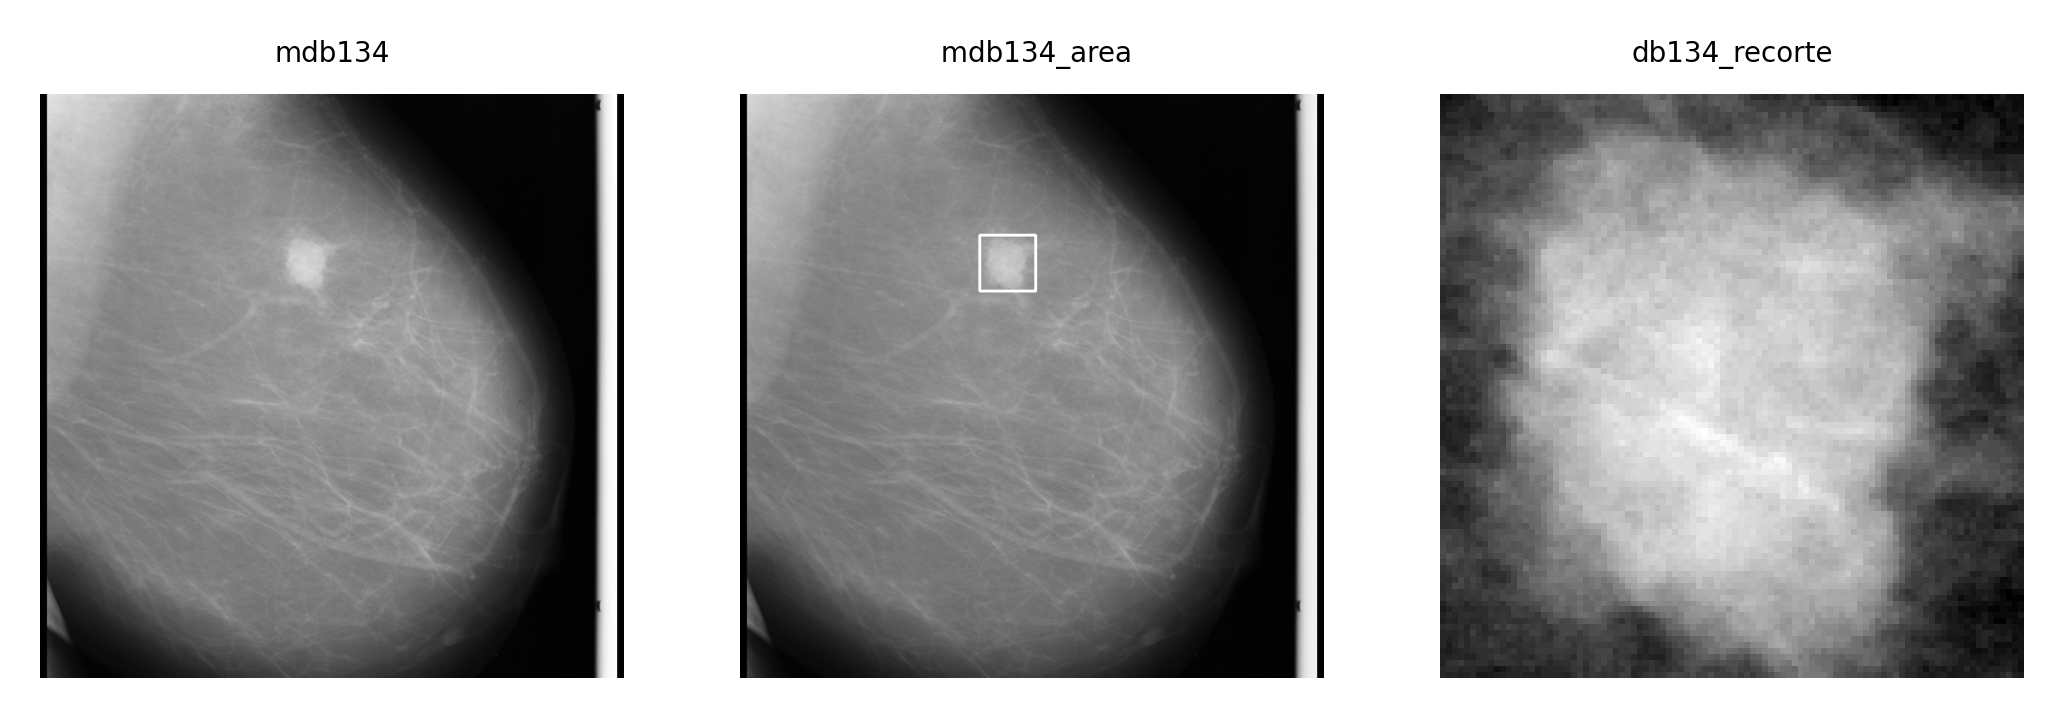

In [ ]:
# MIAS 134
# MISC Otras masas mal definidas

mdb134 = leer_imagen (ruta+'mdb134.pgm')
tamaño_imagen(mdb134)

mdb134_area= dibujar_area_afectada_mias(mdb134, 469, 728, 49)

mdb134_recorte = recorte_area_afectada_mias(mdb134, 469, 728, 49)

graficar_tresimagenes_horizontaltitulo(mdb134, mdb134_area, mdb134_recorte, 'mdb134', ' mdb134_area', 'db134_recorte', tamaño=400)

*  CIRC Masas bien definidas/circunscritas:

masas en el tejido mamario que tienen bordes claros y nítidos. Estas masas son fácilmente distinguibles del tejido mamario circundante debido a su apariencia bien delineada.

<ipython-input-4-45e2782ec38b>:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imagen= io.imread(rute)


dimensiones de la imagen (1024, 1024)
valor MINIMO del pixel: 0
valor MÁXIMO del pixel: 244


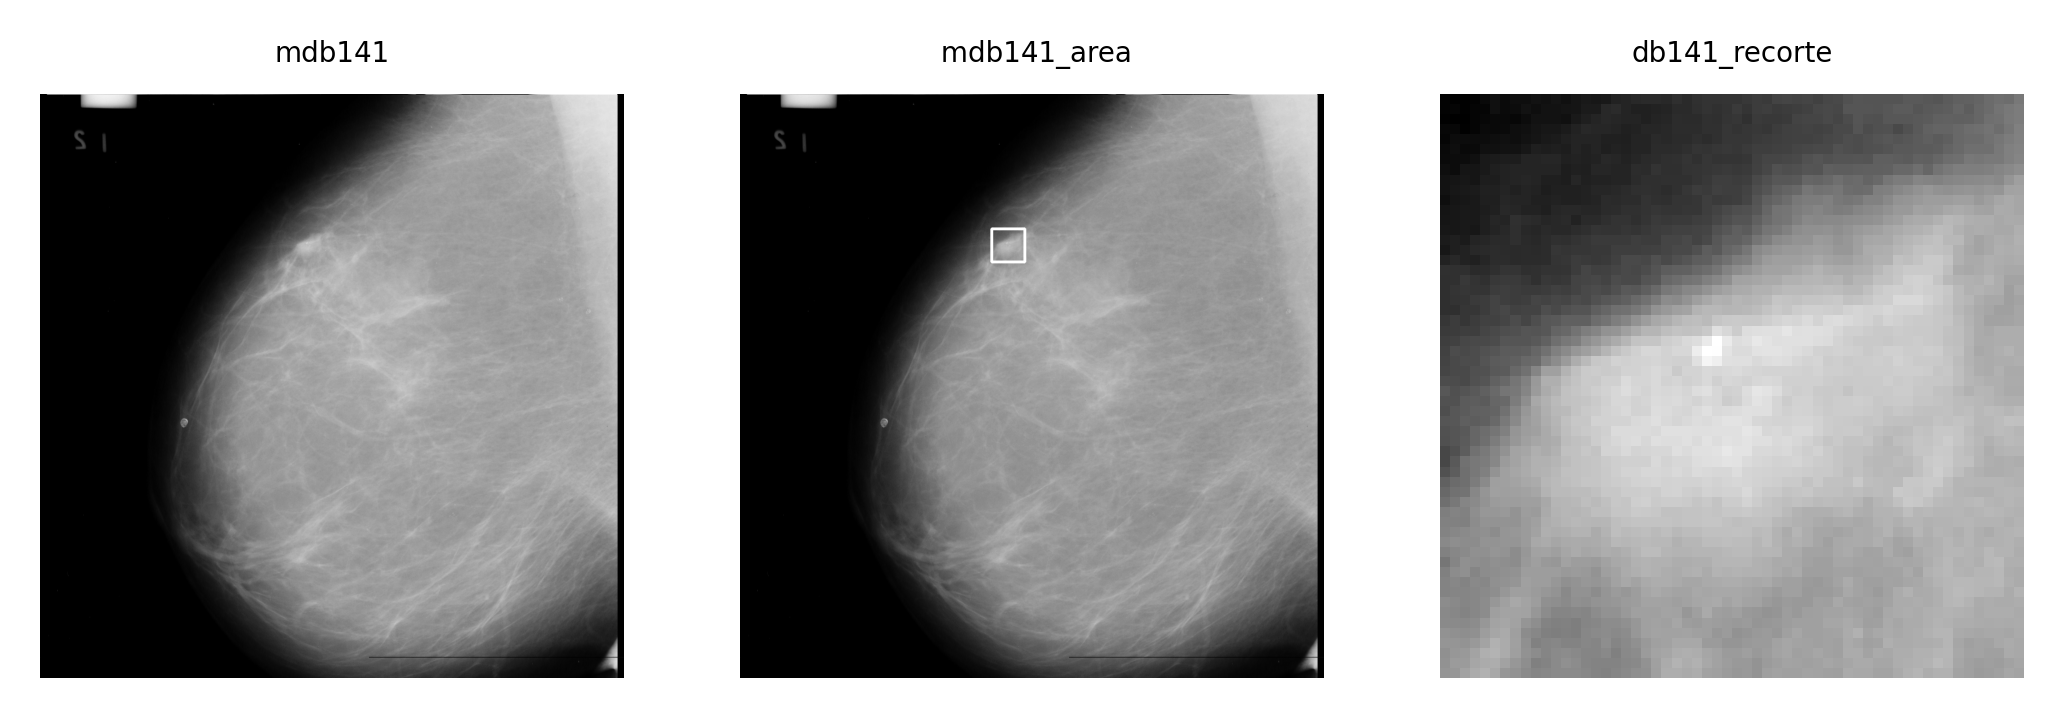

In [ ]:
#  MIAS 141
# CIRC Masas bien definidas/circunscritas

mdb141 = leer_imagen (ruta+'mdb141.pgm')
tamaño_imagen(mdb141)

mdb141_area= dibujar_area_afectada_mias(mdb141, 470, 759, 29)

mdb141_recorte = recorte_area_afectada_mias(mdb141, 470, 759, 29)

graficar_tresimagenes_horizontaltitulo(mdb141, mdb141_area, mdb141_recorte, 'mdb141', ' mdb141_area', 'db141_recorte', tamaño=400)

*  SPIC Masas espiculadas:

es una masa que tiene bordes irregulares y prolongaciones en forma de espículas (parecidas a picos o espinas) que irradian desde el centro de la masa hacia el tejido circundante. Estas características suelen ser un signo preocupante, ya que las masas espiculadas tienen una mayor probabilidad de ser malignas en comparación con las masas de bordes lisos o bien definidos.

<ipython-input-4-45e2782ec38b>:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imagen= io.imread(rute)


dimensiones de la imagen (1024, 1024)
valor MINIMO del pixel: 0
valor MÁXIMO del pixel: 235


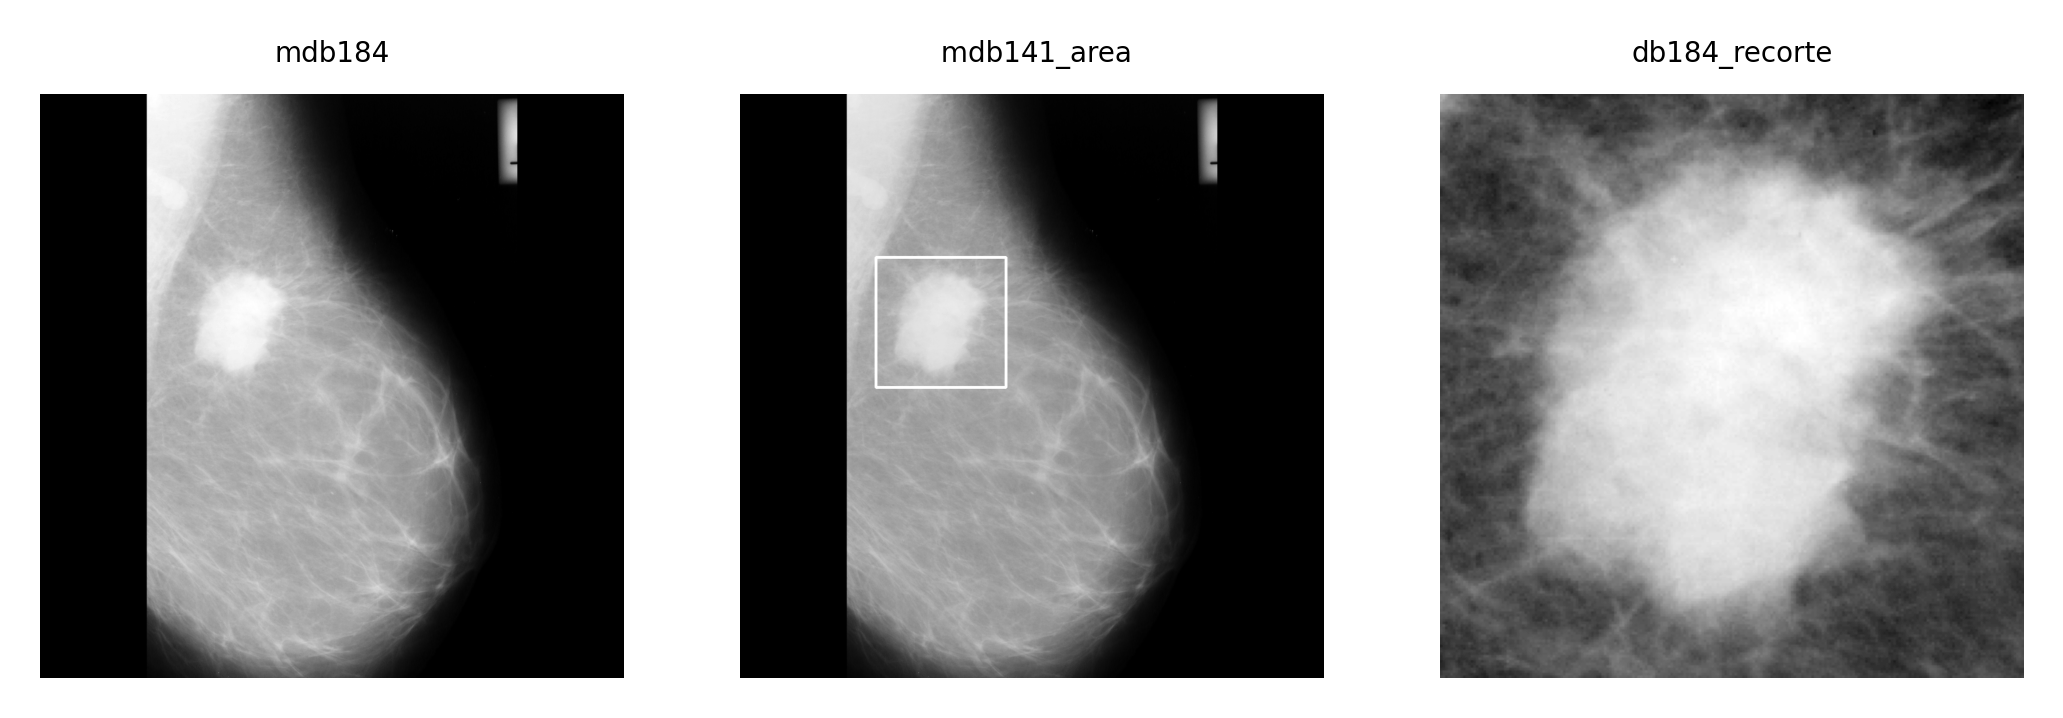

In [ ]:
#  MIAS 184
# SPIC Masas espiculadas

mdb184 = leer_imagen (ruta+'mdb184.pgm')
tamaño_imagen(mdb184)

mdb184_area= dibujar_area_afectada_mias(mdb184,352, 624, 114)

mdb184_recorte = recorte_area_afectada_mias(mdb184, 352, 624, 114)

graficar_tresimagenes_horizontaltitulo(mdb184, mdb184_area, mdb184_recorte, 'mdb184', ' mdb141_area', 'db184_recorte', tamaño=400)

<ipython-input-4-45e2782ec38b>:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imagen= io.imread(rute)


dimensiones de la imagen (1024, 1024)
valor MINIMO del pixel: 0
valor MÁXIMO del pixel: 235


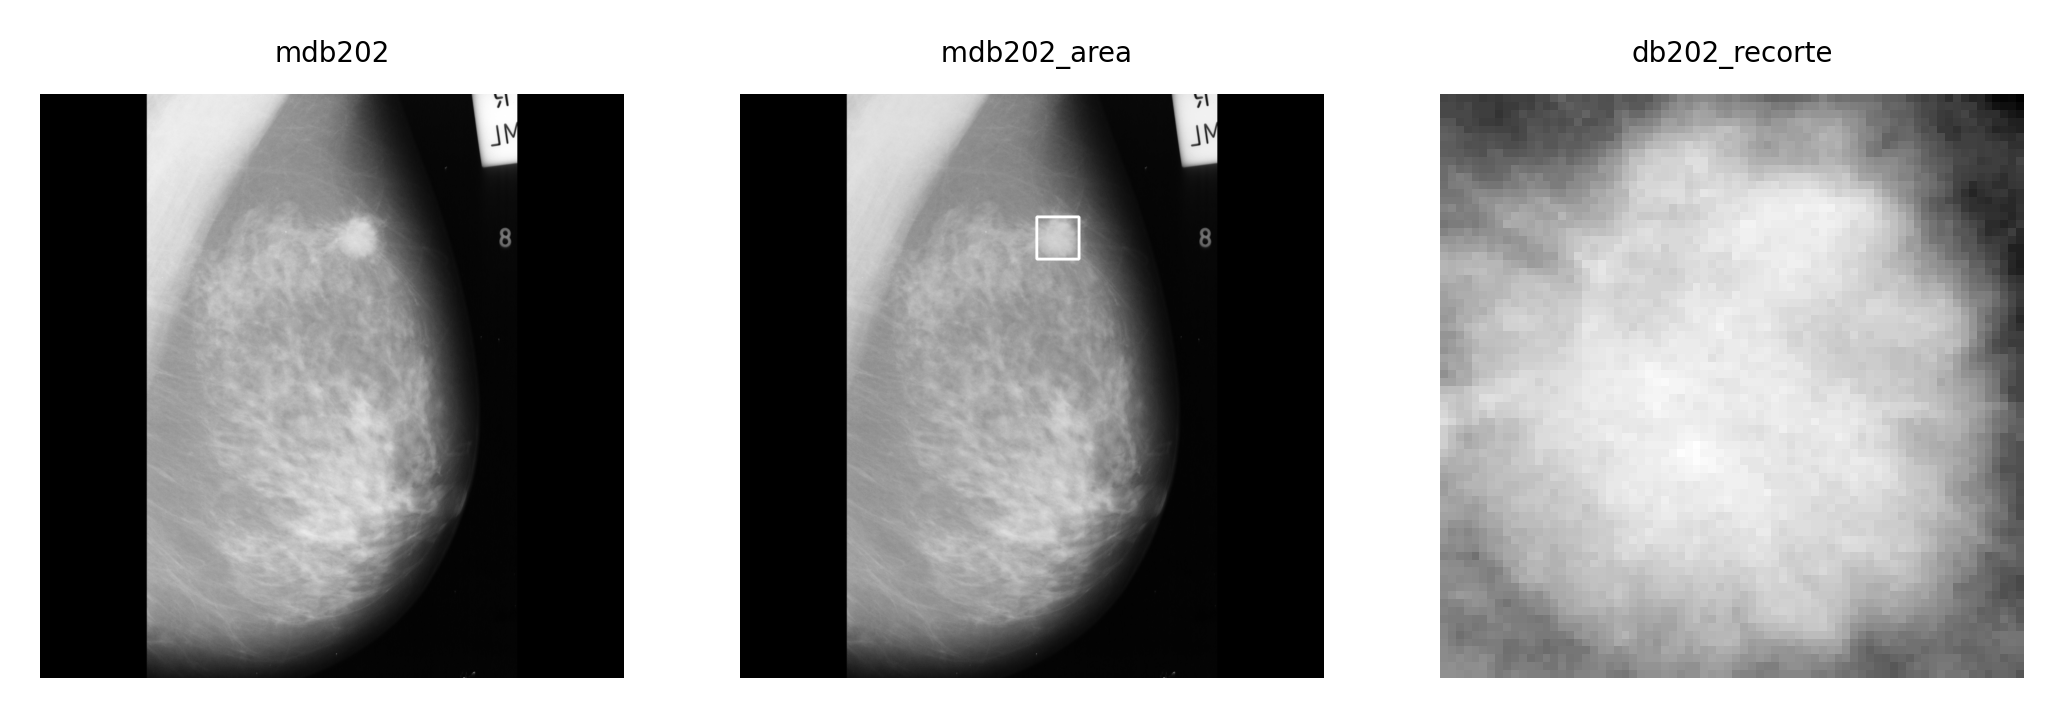

In [ ]:
#  MIAS 202
# SPIC Masas espiculadas
# bordes irregulares y prolongaciones en forma de espículas

mdb202 = leer_imagen (ruta+'mdb202.pgm')
tamaño_imagen(mdb184)

mdb202_area= dibujar_area_afectada_mias(mdb202,557, 772 ,37)

mdb202_recorte = recorte_area_afectada_mias(mdb202, 557, 772 ,37)

graficar_tresimagenes_horizontaltitulo(mdb202, mdb202_area, mdb202_recorte , 'mdb202', ' mdb202_area', 'db202_recorte', tamaño=400)

<ipython-input-4-45e2782ec38b>:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imagen= io.imread(rute)


dimensiones de la imagen (1024, 1024)
valor MINIMO del pixel: 0
valor MÁXIMO del pixel: 241


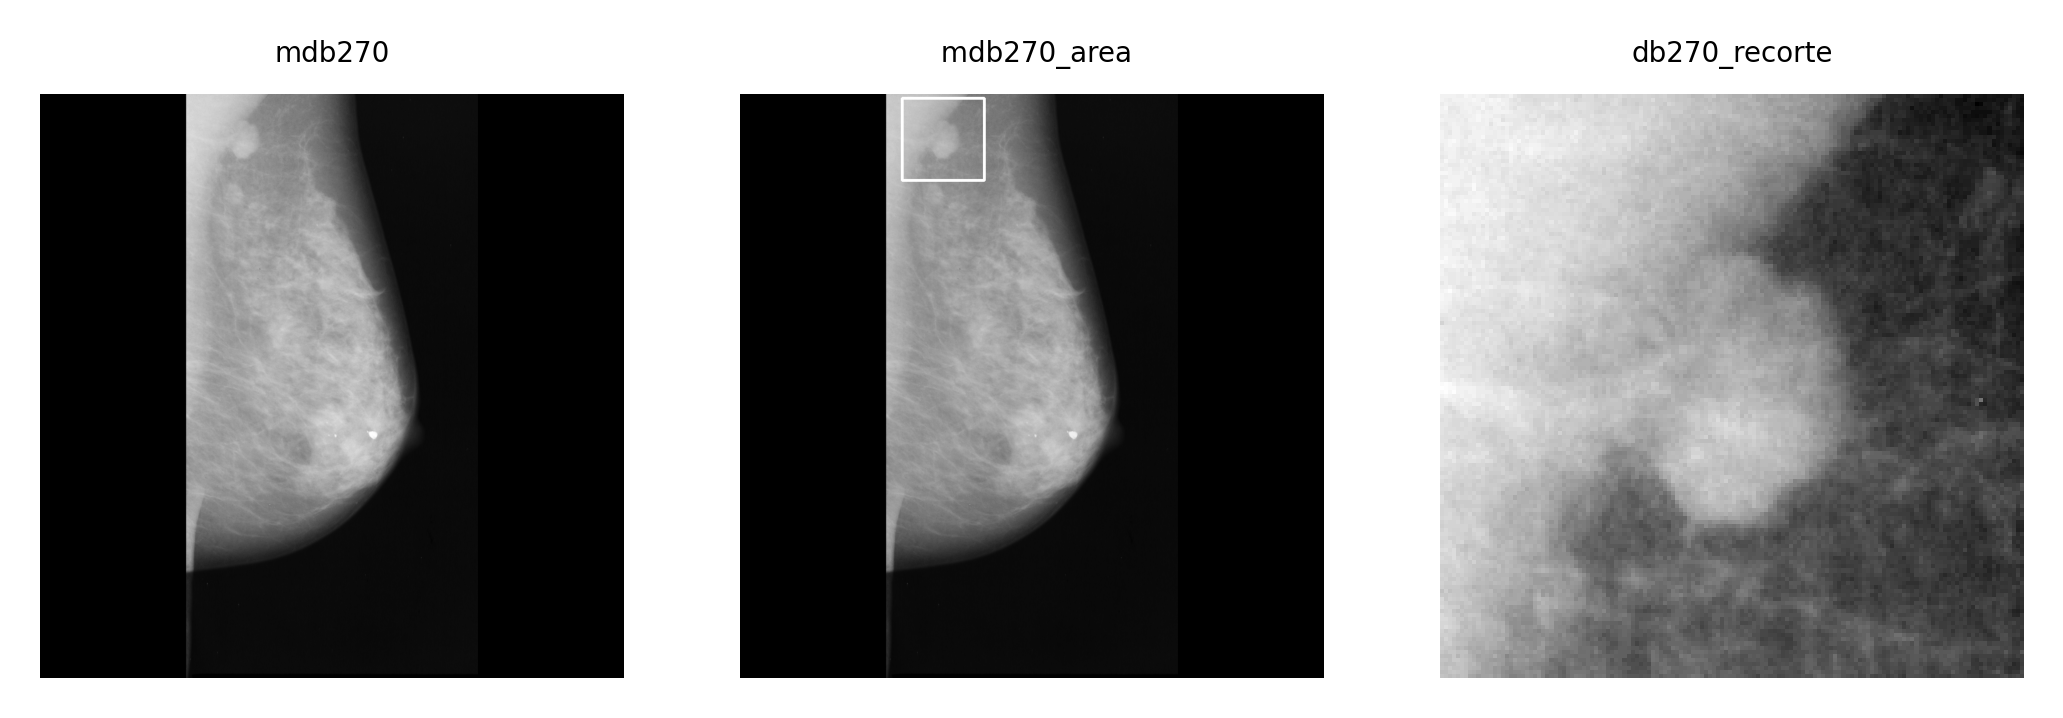

In [ ]:
#  MIAS 270
#  CIRC Masas bien definidas/circunscritas

mdb270 = leer_imagen (ruta+'mdb270.pgm')
tamaño_imagen(mdb270)

mdb270_area= dibujar_area_afectada_mias(mdb270,356, 945 ,72)

mdb270_recorte = recorte_area_afectada_mias(mdb270, 356, 945 ,72)

graficar_tresimagenes_horizontaltitulo(mdb270, mdb270_area, mdb270_recorte , 'mdb270', ' mdb270_area', 'db270_recorte', tamaño=400)

<ipython-input-4-45e2782ec38b>:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imagen= io.imread(rute)


dimensiones de la imagen (1024, 1024)
valor MINIMO del pixel: 0
valor MÁXIMO del pixel: 241


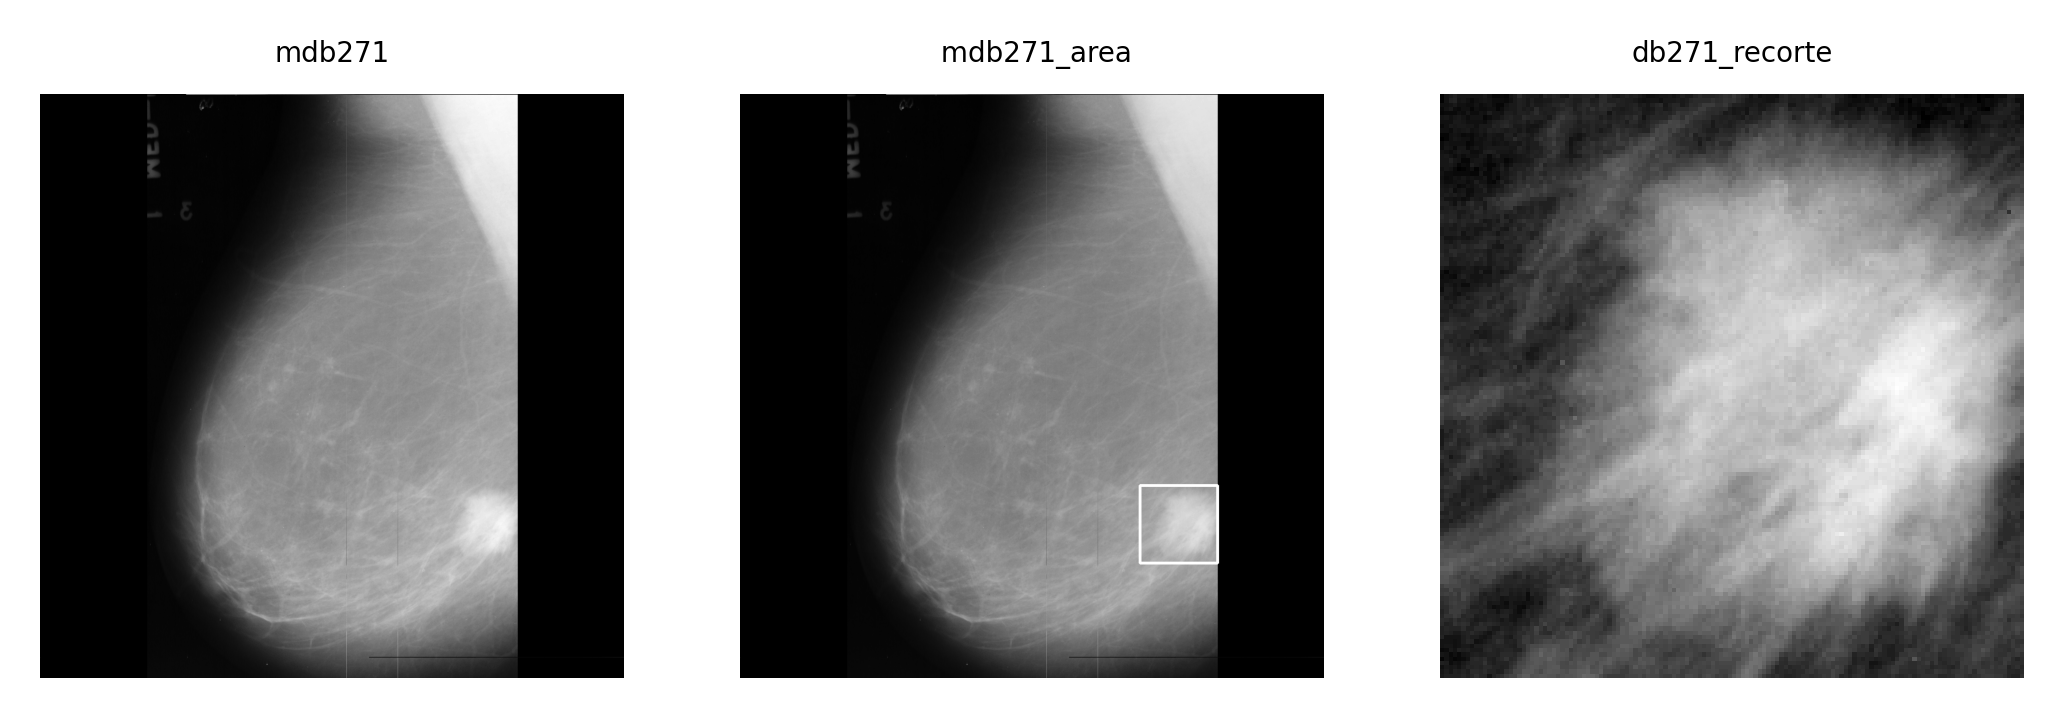

In [ ]:
#  MIAS 271
# MISC Otras masas mal definidas

mdb271 = leer_imagen (ruta+'mdb271.pgm')
tamaño_imagen(mdb270)

mdb271_area= dibujar_area_afectada_mias(mdb271,769, 270 ,68) # dataset 784, 270 ,68

mdb271_recorte = recorte_area_afectada_mias(mdb271,769, 270 ,68 )

graficar_tresimagenes_horizontaltitulo(mdb271, mdb271_area, mdb271_recorte , 'mdb271', ' mdb271_area', 'db271_recorte', tamaño=400)

# Img para Blobs - Malignas

<ipython-input-4-45e2782ec38b>:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imagen= io.imread(rute)


dimensiones de la imagen (1024, 1024)
valor MINIMO del pixel: 0
valor MÁXIMO del pixel: 240


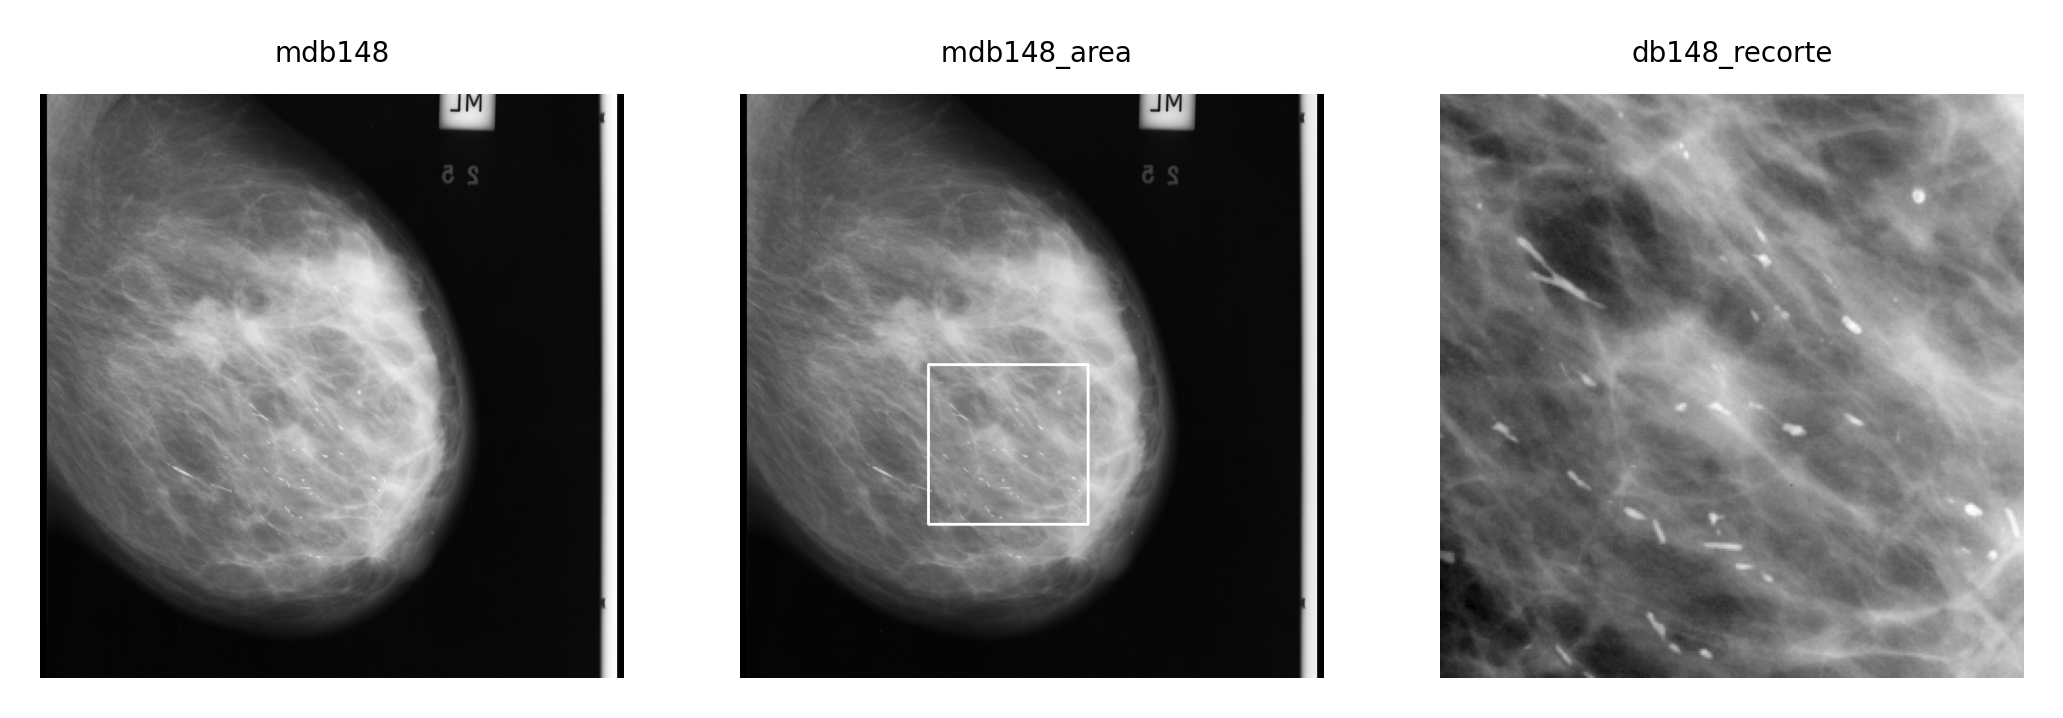

In [ ]:
# MIAS 148
# SPIC Masas espiculadas

mdb148 = leer_imagen (ruta+'mdb148.pgm')
tamaño_imagen(mdb148)

mdb148_area= dibujar_area_afectada_mias(mdb148,470, 410, 140)  #326, 607, 174 dataset

mdb148_recorte = recorte_area_afectada_mias(mdb148, 470, 410, 140)

graficar_tresimagenes_horizontaltitulo(mdb148, mdb148_area, mdb148_recorte , 'mdb148', ' mdb148_area', 'db148_recorte', tamaño=400)

<ipython-input-4-45e2782ec38b>:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imagen= io.imread(rute)


dimensiones de la imagen (1024, 1024)
valor MINIMO del pixel: 0
valor MÁXIMO del pixel: 241


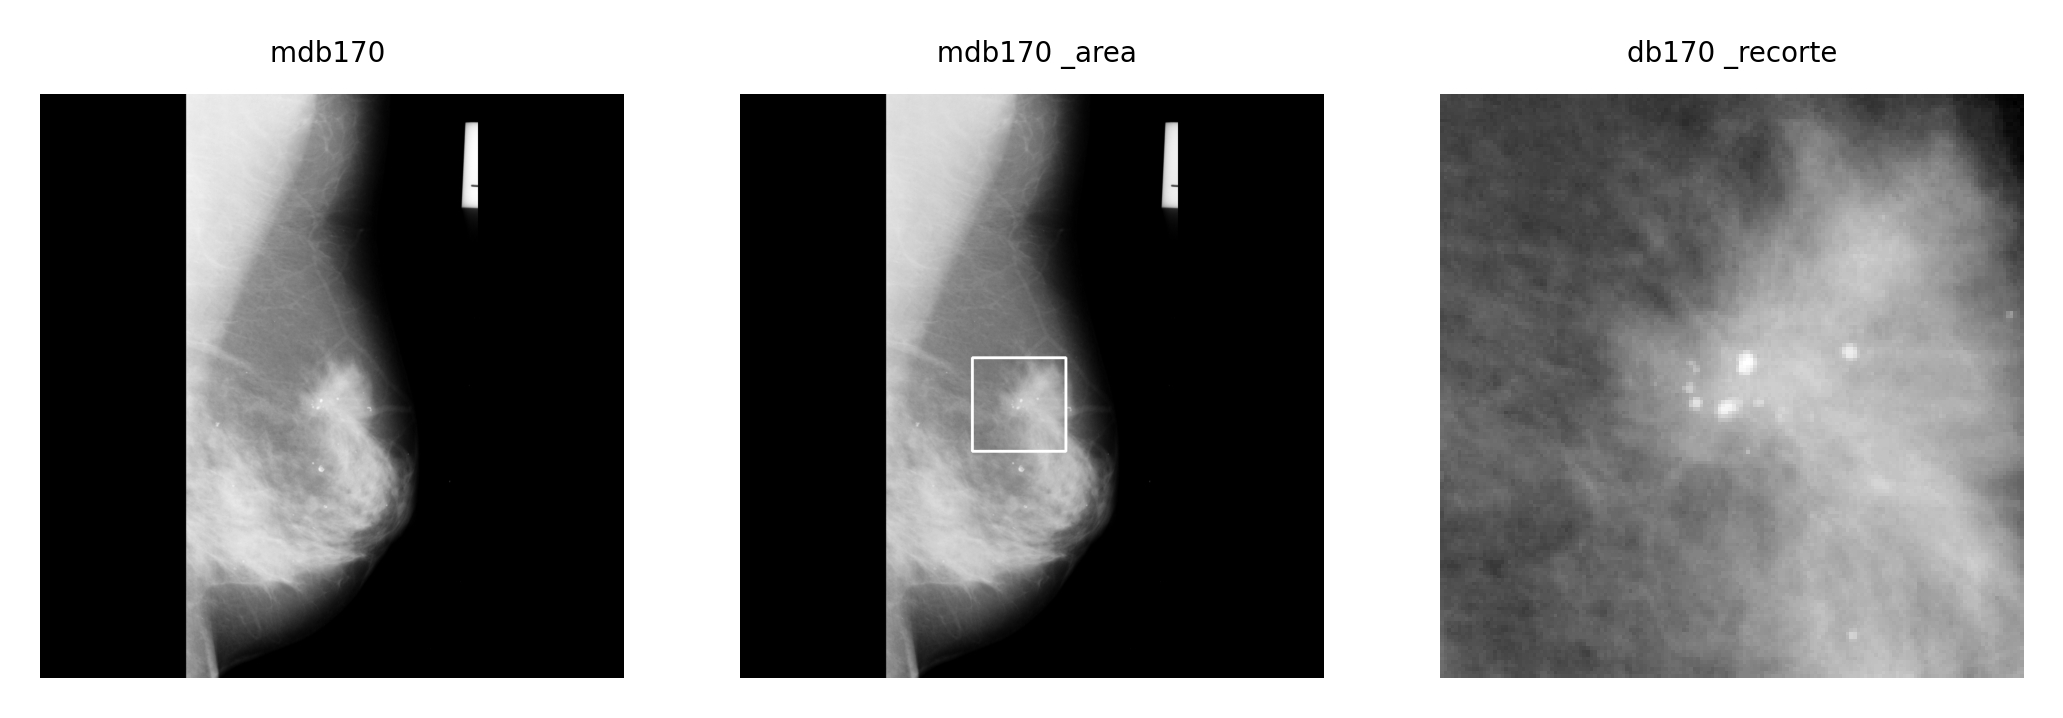

In [ ]:
# MIAS 170
#  ARCH Distorsión arquitectónica

mdb170 = leer_imagen (ruta+'mdb170.pgm')
tamaño_imagen(mdb170 )

mdb170_area= dibujar_area_afectada_mias(mdb170, 489 ,480, 82)

mdb170_recorte = recorte_area_afectada_mias(mdb170, 489 ,480, 82)

graficar_tresimagenes_horizontaltitulo(mdb170, mdb170_area, mdb170_recorte , 'mdb170 ', ' mdb170 _area', 'db170 _recorte', tamaño=400)

<ipython-input-4-45e2782ec38b>:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imagen= io.imread(rute)


dimensiones de la imagen (1024, 1024)
valor MINIMO del pixel: 0
valor MÁXIMO del pixel: 240


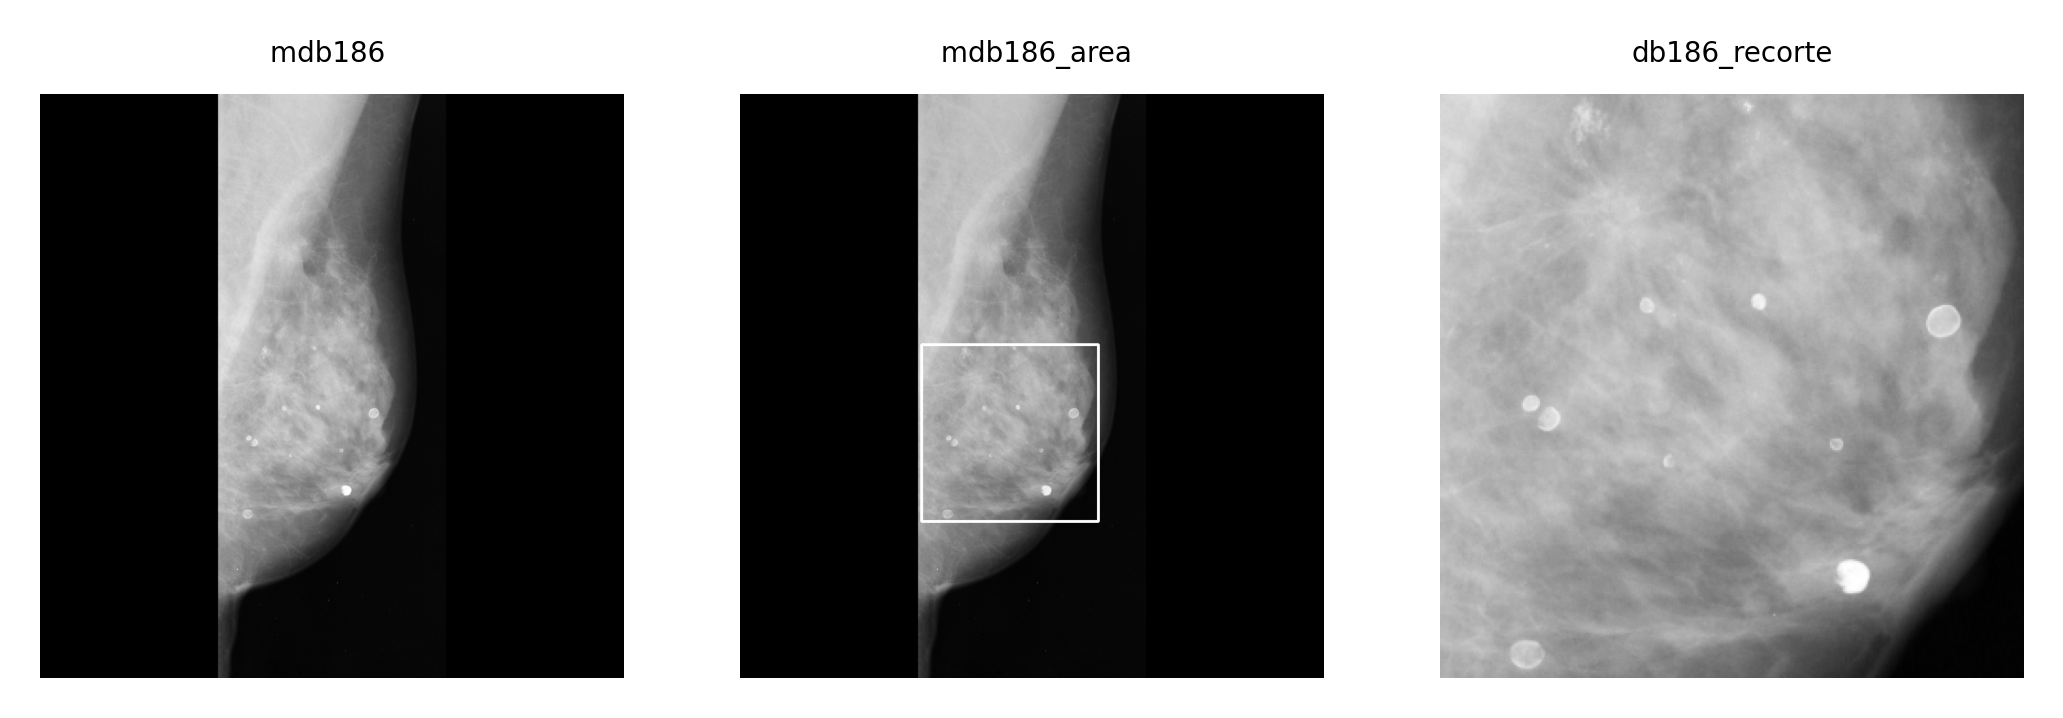

In [ ]:
# MIAS 186
# SPIC

mdb186 = leer_imagen (ruta+'mdb186.pgm')
tamaño_imagen(mdb186)

mdb186_area= dibujar_area_afectada_mias(mdb186,473 ,430 ,155) # mias 403 ,524 ,47

mdb186_recorte = recorte_area_afectada_mias(mdb186, 473 ,430,155)

graficar_tresimagenes_horizontaltitulo(mdb186, mdb186_area, mdb186_recorte , 'mdb186 ', ' mdb186_area', 'db186_recorte', tamaño=400)

#  Mamos con calcificaciones - Benignas

<ipython-input-4-45e2782ec38b>:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imagen= io.imread(rute)


dimensiones de la imagen (1024, 1024)
valor MINIMO del pixel: 0
valor MÁXIMO del pixel: 244


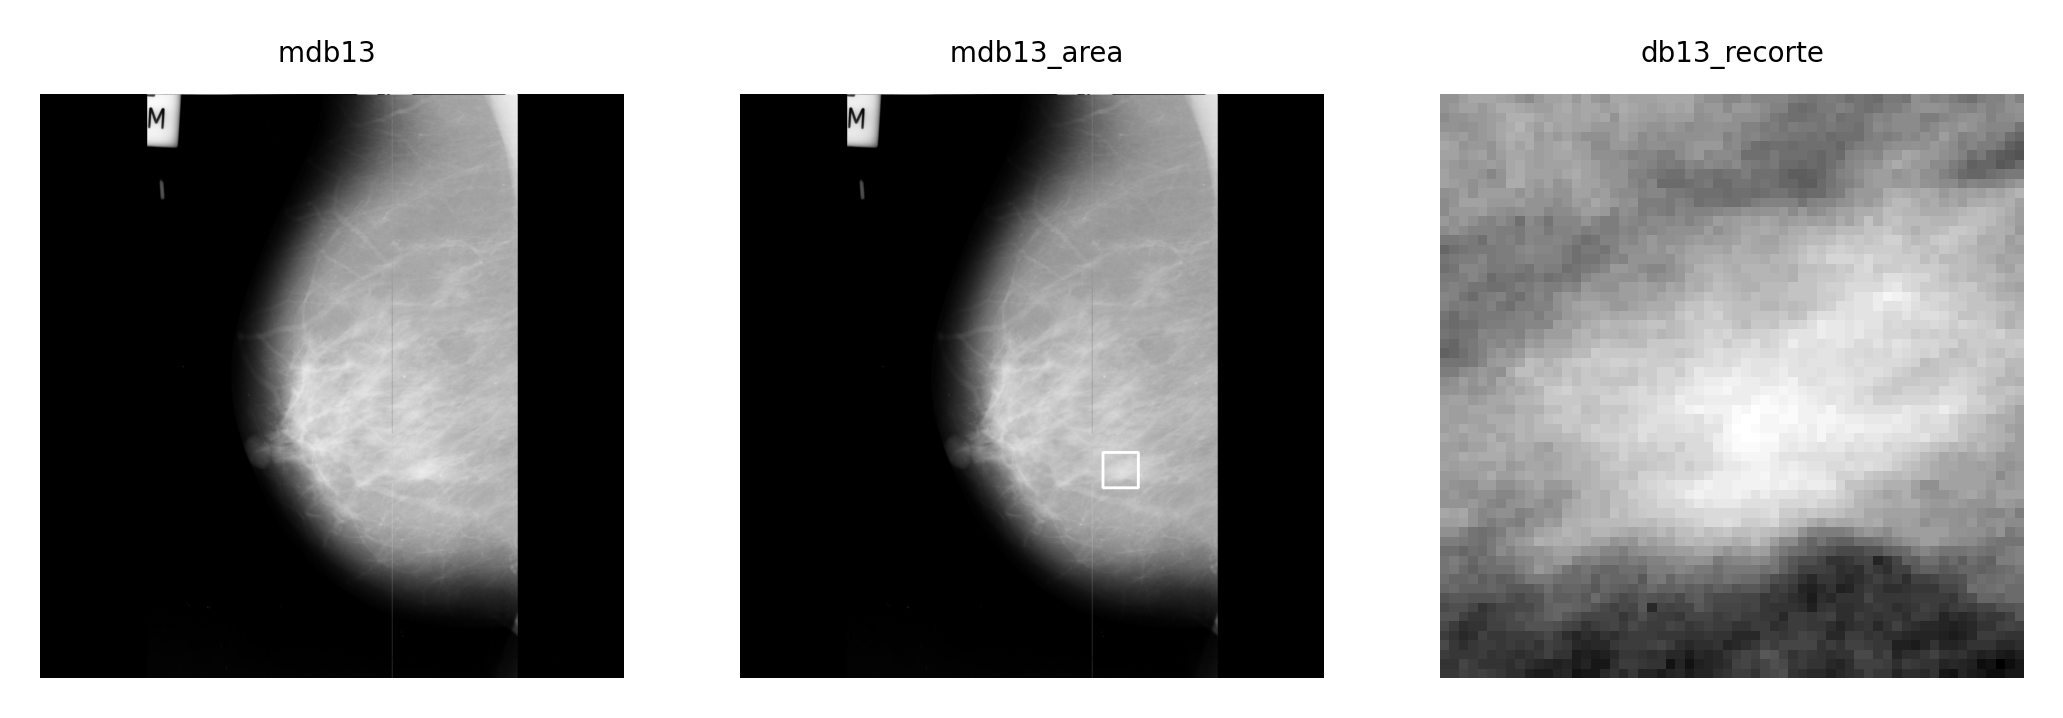

In [ ]:
# MIAS 013 - Otras masas mal definidas-  MISC
# ensayar en la segmentación automatica - como es benigna la metodologia no deberia segmentar nada

mdb13 = leer_imagen (ruta+'mdb013.pgm')
tamaño_imagen(mdb13)

mdb13_area= dibujar_area_afectada_mias(mdb13,667 ,365 ,31)

mdb13_recorte = recorte_area_afectada_mias(mdb13,667 ,365 ,31 )

graficar_tresimagenes_horizontaltitulo(mdb13, mdb13_area, mdb13_recorte , 'mdb13 ', ' mdb13_area', 'db13_recorte', tamaño=400)

<ipython-input-4-45e2782ec38b>:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imagen= io.imread(rute)


dimensiones de la imagen (1024, 1024)
valor MINIMO del pixel: 0
valor MÁXIMO del pixel: 239


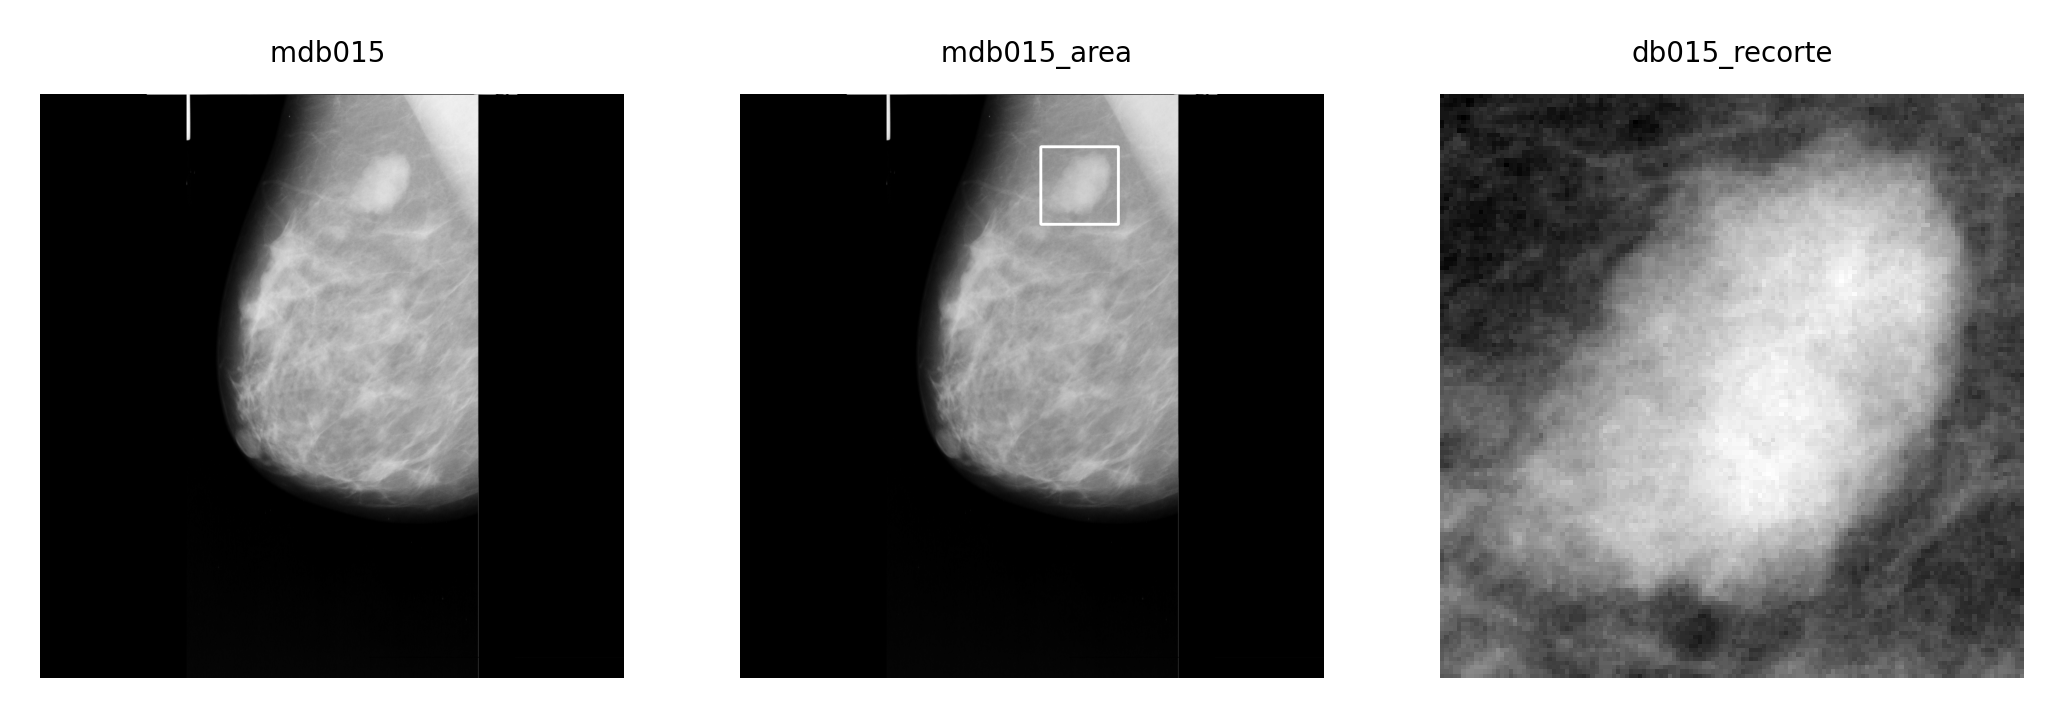

In [ ]:
# MIAS 015 -CIRC Masas bien definidas/circunscritas
# par ensayar dim fractal. Como es benigna, debe dar la dim fractal menor que en las malignas

mdb015 = leer_imagen (ruta+'mdb015.pgm')
tamaño_imagen(mdb015)

mdb015_area= dibujar_area_afectada_mias(mdb015,595, 864, 68)

mdb015_recorte = recorte_area_afectada_mias(mdb015,595, 864, 68)

graficar_tresimagenes_horizontaltitulo(mdb015, mdb015_area, mdb015_recorte , 'mdb015 ', ' mdb015_area', 'db015_recorte', tamaño=400)

<ipython-input-4-45e2782ec38b>:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imagen= io.imread(rute)


dimensiones de la imagen (1024, 1024)
valor MINIMO del pixel: 0
valor MÁXIMO del pixel: 230


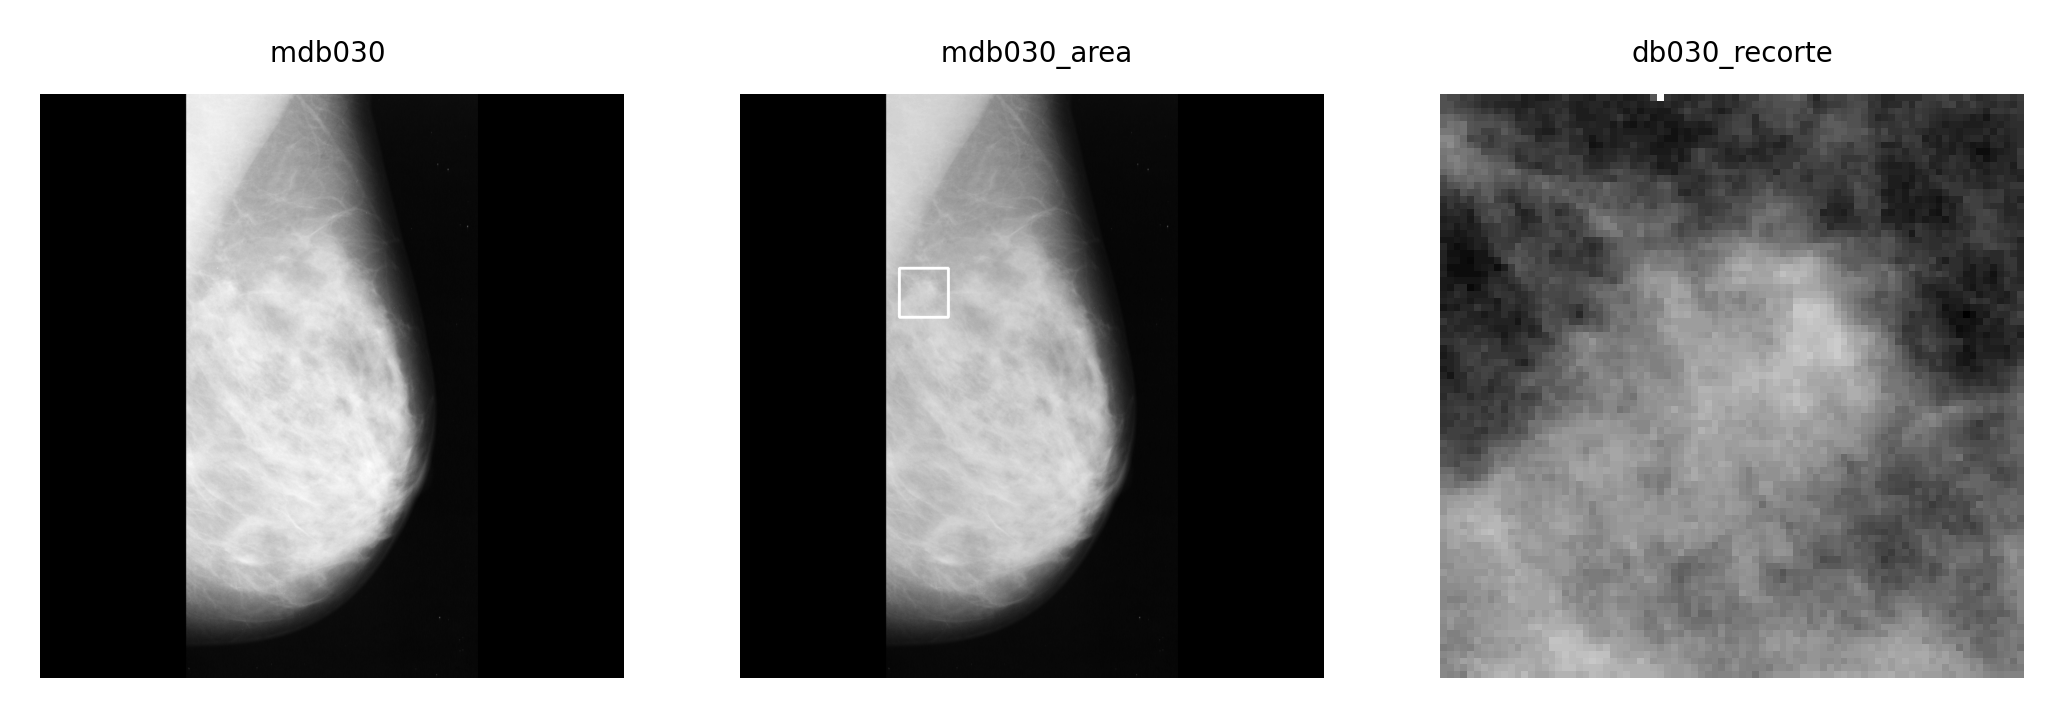

In [ ]:
# MIAS 030 - Otras masas mal definidas- MISC
# par ensayar dim fractal. Como es benigna, debe dar la dim fractal menor que en las malignas

mdb030 = leer_imagen (ruta+'mdb030.pgm')
tamaño_imagen(mdb030)

mdb030_area= dibujar_area_afectada_mias(mdb030,322, 676, 43)

mdb030_recorte = recorte_area_afectada_mias(mdb030,322, 676, 43)

graficar_tresimagenes_horizontaltitulo(mdb030, mdb030_area, mdb030_recorte , 'mdb030 ', ' mdb030_area', 'db030_recorte', tamaño=400)

<ipython-input-4-45e2782ec38b>:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imagen= io.imread(rute)


dimensiones de la imagen (1024, 1024)
valor MINIMO del pixel: 0
valor MÁXIMO del pixel: 224


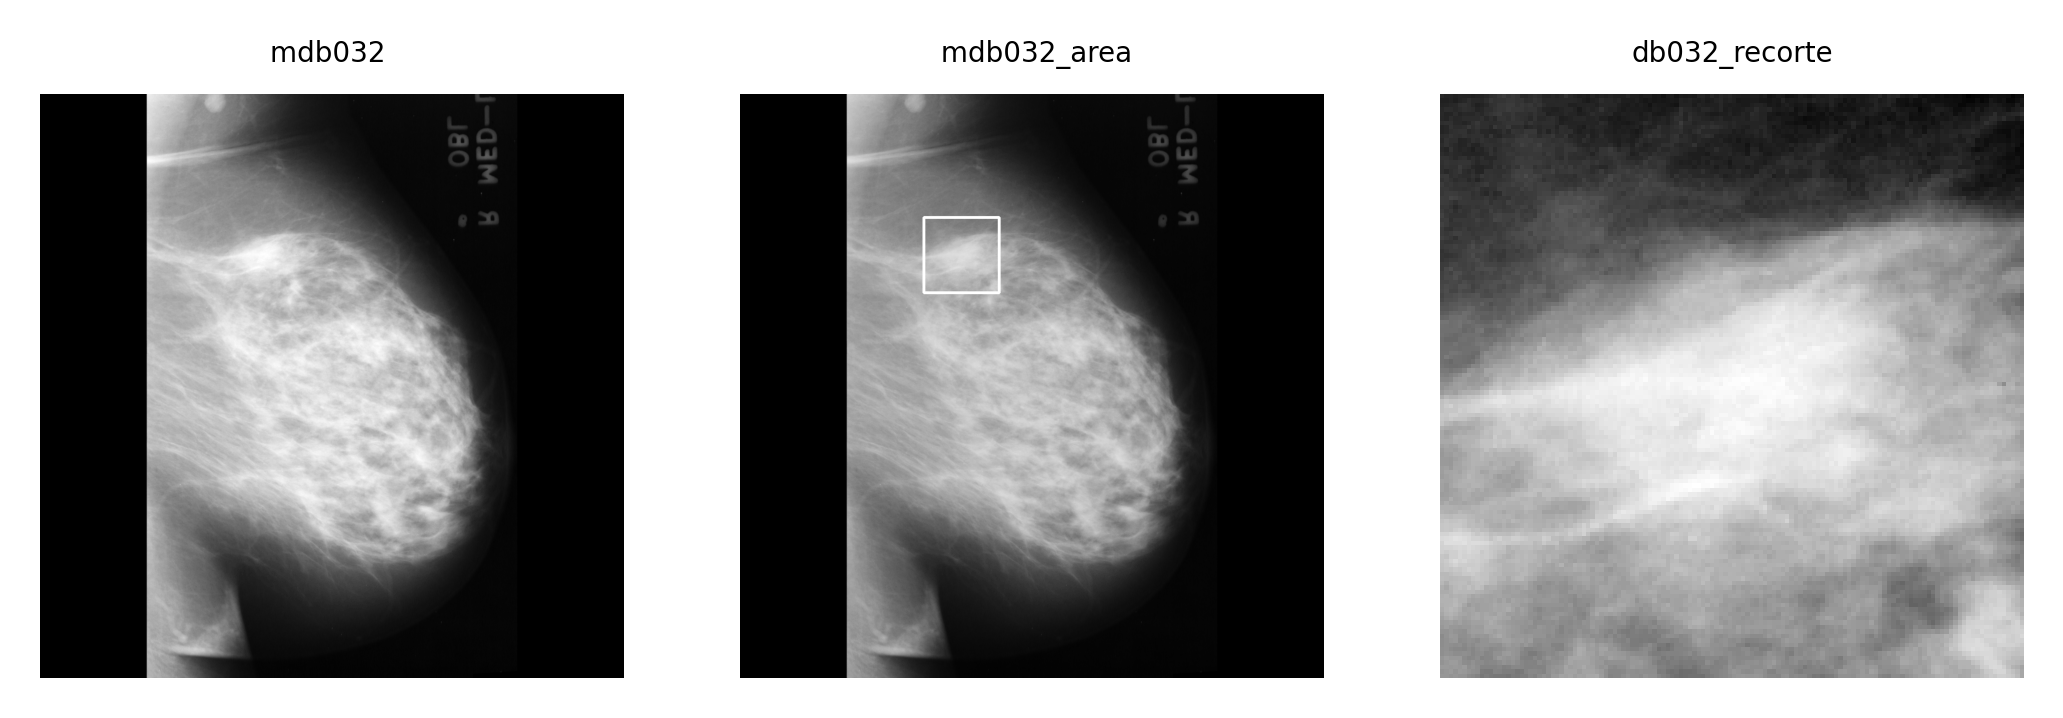

In [ ]:
# MIAS 032 - Otras masas mal definidas- MISC
# par ensayar dim fractal. Como es benigna, debe dar la dim fractal menor que en las malignas

mdb032 = leer_imagen (ruta+'mdb032.pgm')
tamaño_imagen(mdb032)

mdb032_area= dibujar_area_afectada_mias(mdb032,388 ,742 ,66)

mdb032_recorte = recorte_area_afectada_mias(mdb032,388 ,742 ,66)

graficar_tresimagenes_horizontaltitulo(mdb032, mdb032_area, mdb032_recorte , 'mdb032 ', ' mdb032_area', 'db032_recorte', tamaño=400)

<ipython-input-4-45e2782ec38b>:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imagen= io.imread(rute)


dimensiones de la imagen (1024, 1024)
valor MINIMO del pixel: 0
valor MÁXIMO del pixel: 224


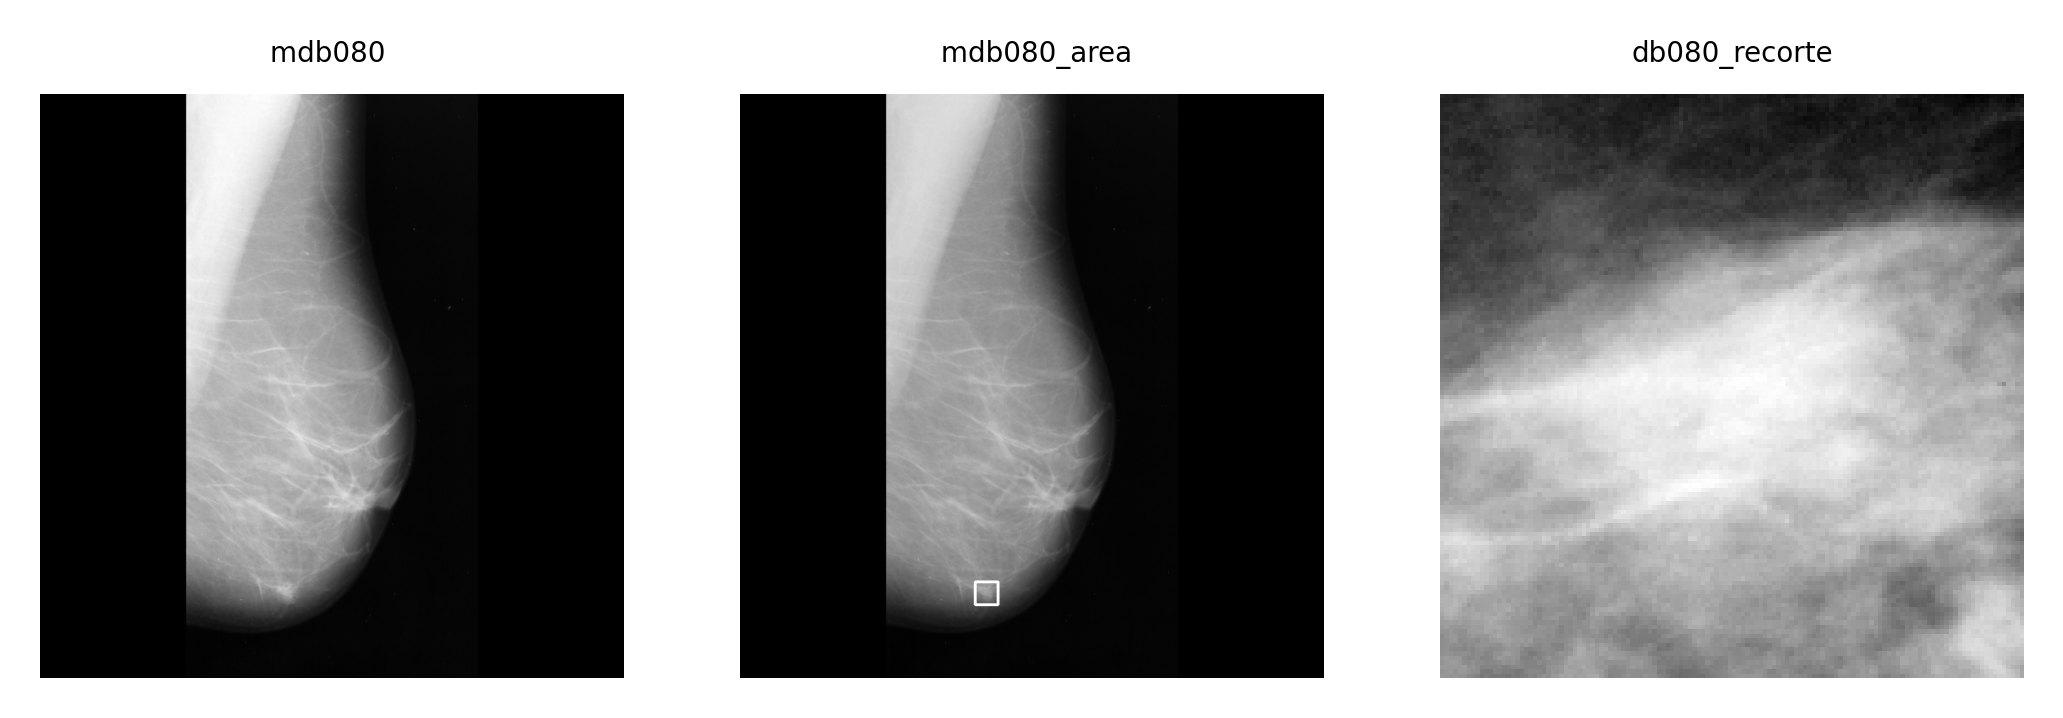

In [ ]:
# MIAS 080 - CIRC
# par ensayar dim fractal. Como es benigna, debe dar la dim fractal menor que en las malignas

mdb080 = leer_imagen (ruta+'mdb080.pgm')
tamaño_imagen(mdb080)

mdb080_area= dibujar_area_afectada_mias(mdb080,432, 149, 20)

mdb080_recorte = recorte_area_afectada_mias(mdb080,432, 149, 20)

graficar_tresimagenes_horizontaltitulo(mdb080, mdb080_area, mdb032_recorte , 'mdb080 ', ' mdb080_area', 'db080_recorte', tamaño=400)

# Para falsos positivos - Malignas

<ipython-input-4-45e2782ec38b>:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imagen= io.imread(rute)


dimensiones de la imagen (1024, 1024)
valor MINIMO del pixel: 0
valor MÁXIMO del pixel: 229


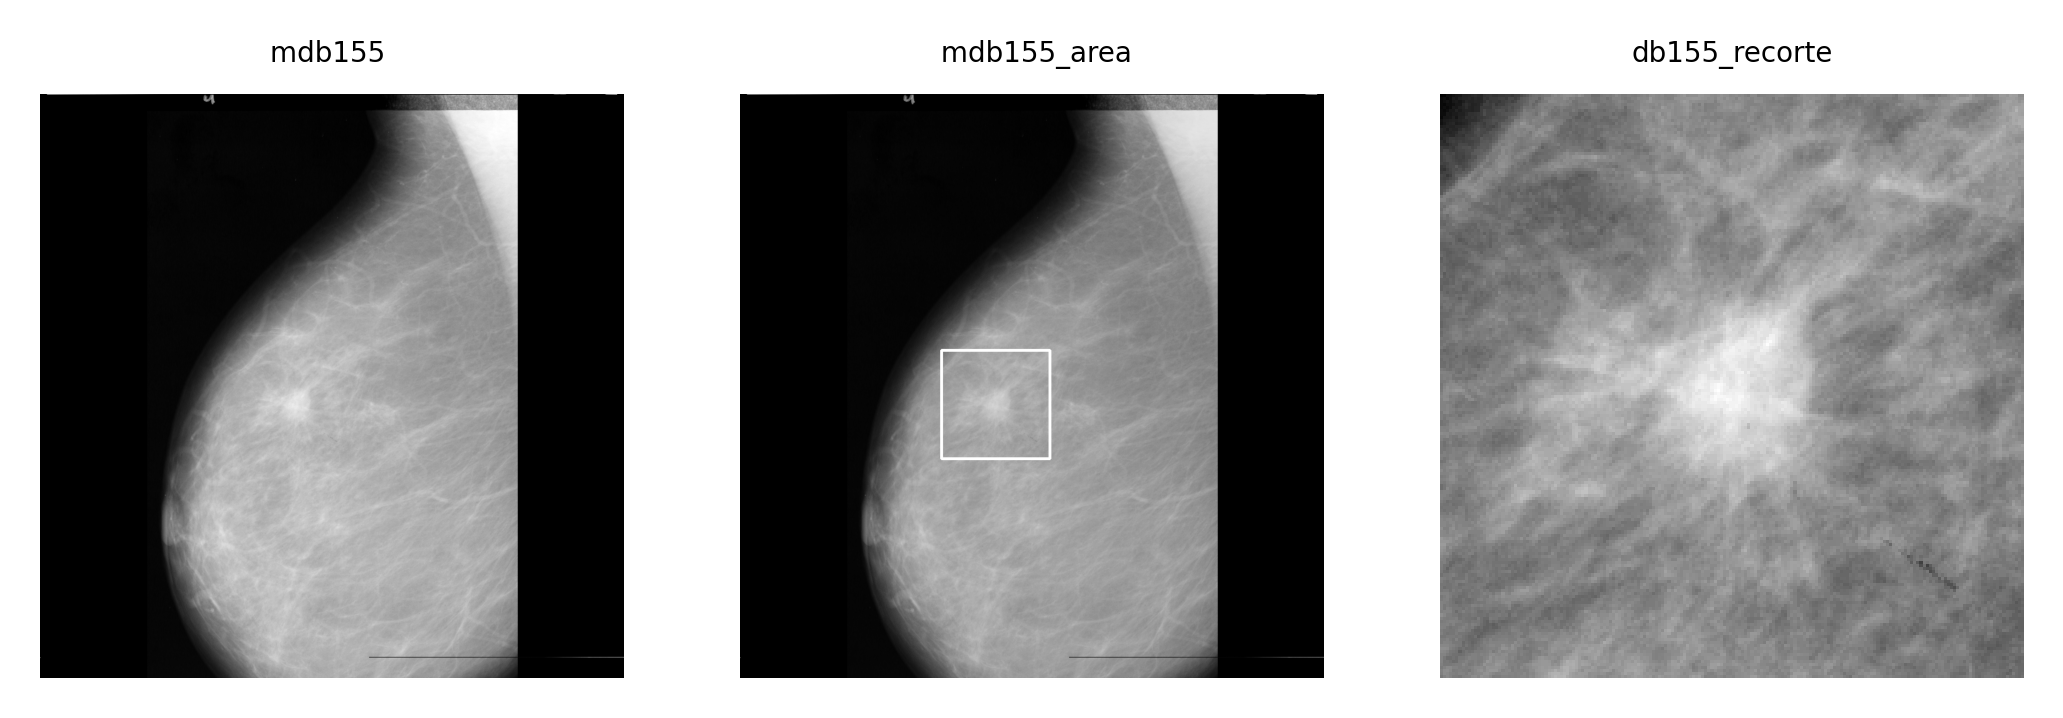

In [ ]:
# MIAS 155 - ARCH - Distorsión arquitectónica
# par ensayar dim fractal. Como es benigna, debe dar la dim fractal menor que en las malignas

mdb155= leer_imagen (ruta+'mdb155.pgm')
tamaño_imagen(mdb155)

mdb155_area= dibujar_area_afectada_mias(mdb155,448 ,480 ,95 )

mdb155_recorte = recorte_area_afectada_mias(mdb155,448 ,480 ,95  )

graficar_tresimagenes_horizontaltitulo(mdb155, mdb155_area, mdb155_recorte , 'mdb155 ', ' mdb155_area', 'db155_recorte', tamaño=400)

<ipython-input-4-45e2782ec38b>:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imagen= io.imread(rute)


dimensiones de la imagen (1024, 1024)
valor MINIMO del pixel: 0
valor MÁXIMO del pixel: 214


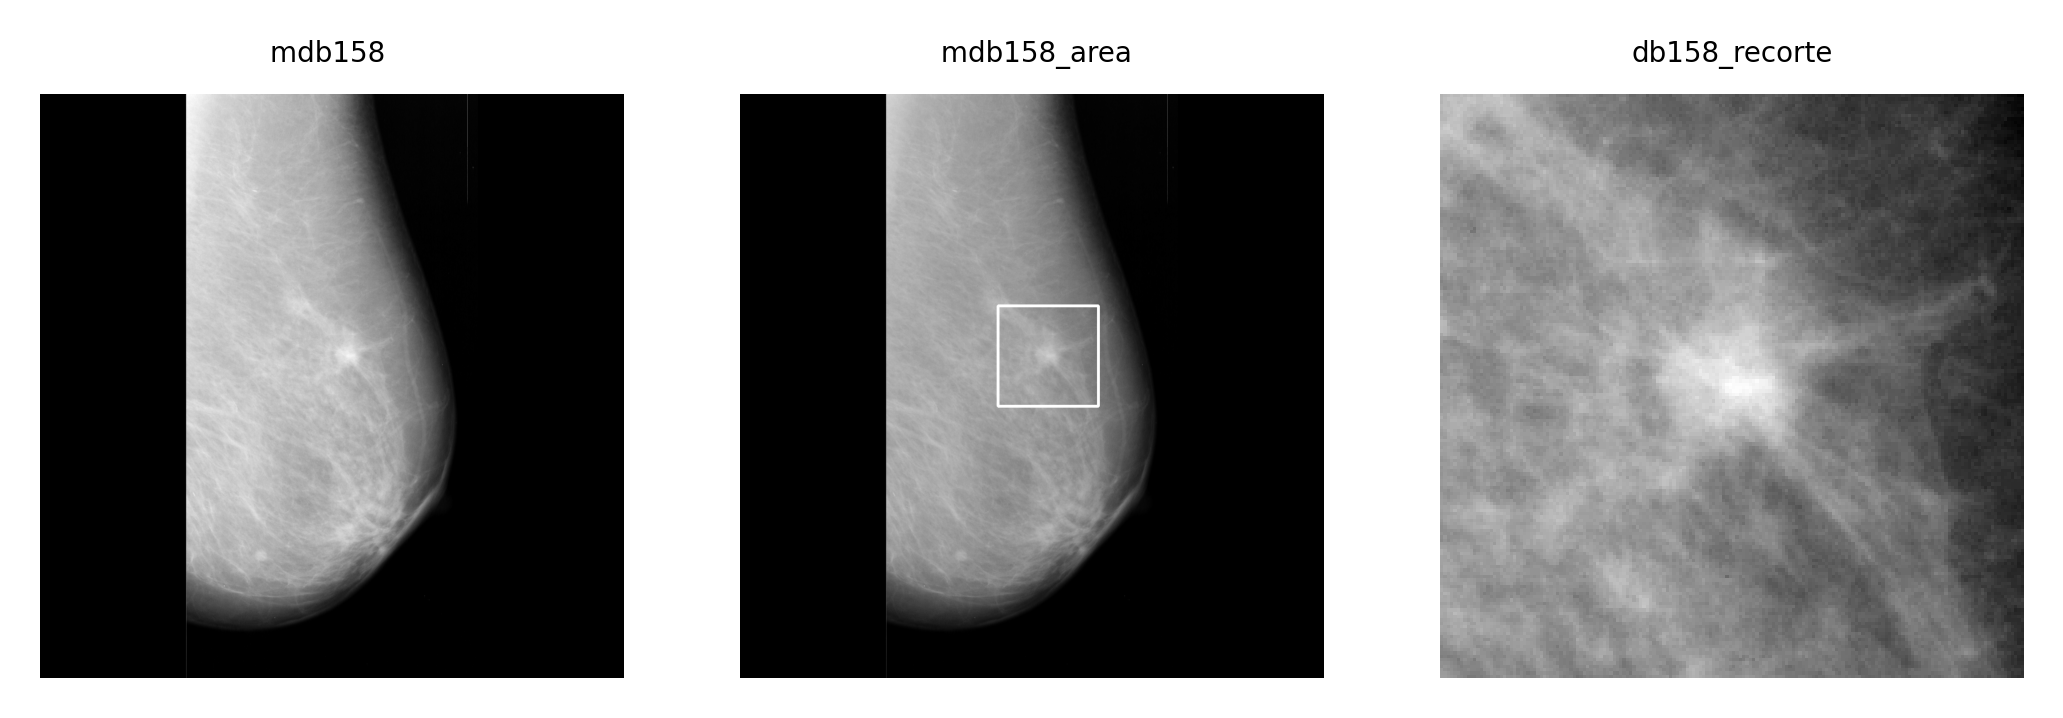

In [ ]:
# MIAS 158 - ARCH - Distorsión arquitectónica
# par ensayar dim fractal. Como es benigna, debe dar la dim fractal menor que en las malignas

mdb158=leer_imagen(ruta+'mdb158.pgm')
tamaño_imagen(mdb158)

mdb158_area= dibujar_area_afectada_mias(mdb158, 540, 565, 88 )

mdb158_recorte = recorte_area_afectada_mias(mdb158, 540, 565, 88 )

graficar_tresimagenes_horizontaltitulo(mdb158, mdb158_area, mdb158_recorte , 'mdb158 ', ' mdb158_area', 'db158_recorte', tamaño=400)